In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 


In [3]:
df=pd.read_csv('Top 2000 Companies Financial Data 2024.csv')

In [5]:
df

,Unnamed: 0,Name,Country,Sales,Profit,Assets,Market Value
0,0,JPMorganChase,United States,$252.9 B,$50 B,"$4,090.7 B",$588.1 B
1,1,Berkshire Hathaway,United States,$369 B,$73.4 B,"$1,070 B",$899.1 B
2,2,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,$489.1 B,$116.9 B,$661.5 B,"$1,919.3 B"
3,3,ICBC,China,$223.8 B,$50.4 B,"$6,586 B",$215.2 B
4,4,Bank of America,United States,$183.3 B,$25 B,"$3,273.8 B",$307.3 B
...,...,...,...,...,...,...,...
1996,1996,Sichuan Chuantou Energy,China,$201 M,$632.7 M,$8.6 B,$11.3 B
1997,1997,Vietnam Prosperity Joint-sock Commercial Bank,Vietnam,$3.9 B,$460.2 M,$33.2 B,$6 B
1998,1998,Adient,United States,$15.2 B,$158 M,$9.3 B,$2.6 B
1999,1999,CapitaLand Investment,Singapore,$2.2 B,$134.8 M,$25.9 B,$10 B


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    2001 non-null   int64 
 1   Name          2001 non-null   object
 2   Country       2001 non-null   object
 3   Sales         2001 non-null   object
 4   Profit        2001 non-null   object
 5   Assets        2001 non-null   object
 6   Market Value  2001 non-null   object
dtypes: int64(1), object(6)
memory usage: 109.6+ KB


In [9]:
df=df.drop(columns='Unnamed: 0')

In [11]:
df.isna().sum()

Name            0
Country         0
Sales           0
Profit          0
Assets          0
Market Value    0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [27]:
financial_columns = ['Sales', 'Profit', 'Assets', 'Market Value']
for column in financial_columns:
    df[column] = df[column].replace({'\$': '', ',': '', ' B': 'e9', ' M': 'e6'}, regex=True).astype(float)

<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Hp\AppData\Local\Temp\ipykernel_14272\1709353066.py:3: SyntaxWarning: invalid escape sequence '\$'
  df[column] = df[column].replace({'\$': '', ',': '', ' B': 'e9', ' M': 'e6'}, regex=True).astype(float)


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          2001 non-null   object 
 1   Country       2001 non-null   object 
 2   Sales         2001 non-null   float64
 3   Profit        2001 non-null   float64
 4   Assets        2001 non-null   float64
 5   Market Value  2001 non-null   float64
dtypes: float64(4), object(2)
memory usage: 93.9+ KB


In [31]:
df.head()

,Name,Country,Sales,Profit,Assets,Market Value
0,JPMorganChase,United States,2.529000e+11,5.000000e+10,4.090700e+12,5.881000e+11
1,Berkshire Hathaway,United States,3.690000e+11,7.340000e+10,1.070000e+12,8.991000e+11
2,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,4.891000e+11,1.169000e+11,6.615000e+11,1.919300e+12
3,ICBC,China,2.238000e+11,5.040000e+10,6.586000e+12,2.152000e+11
4,Bank of America,United States,1.833000e+11,2.500000e+10,3.273800e+12,3.073000e+11


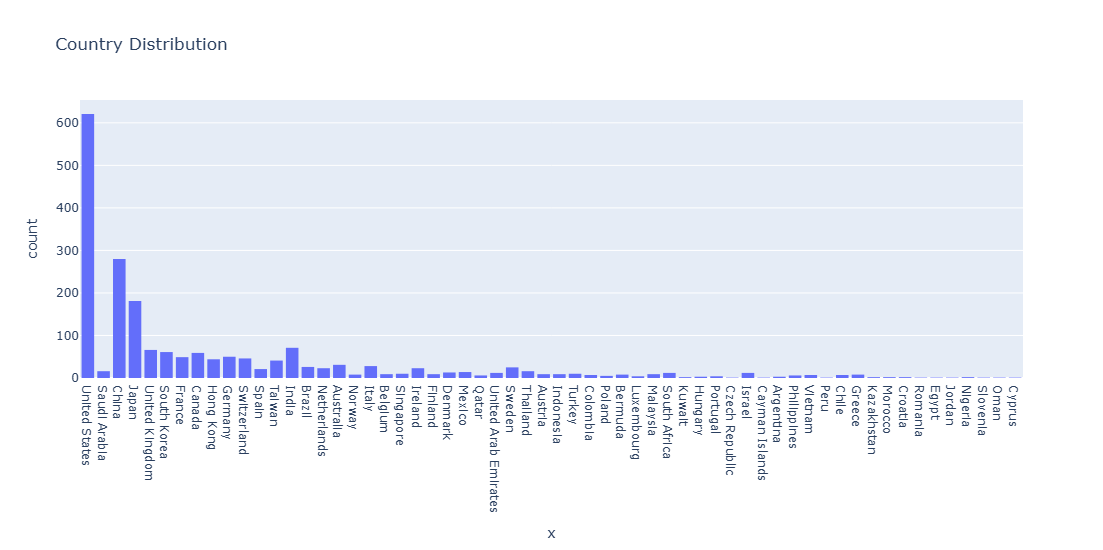

In [43]:
fig=px.histogram(x=df.Country,title='Country Distribution')
fig.update_layout(width=1000,height=550)
fig.show()

from this data usa have more count of companies and after that china ,japan,uk,india follows

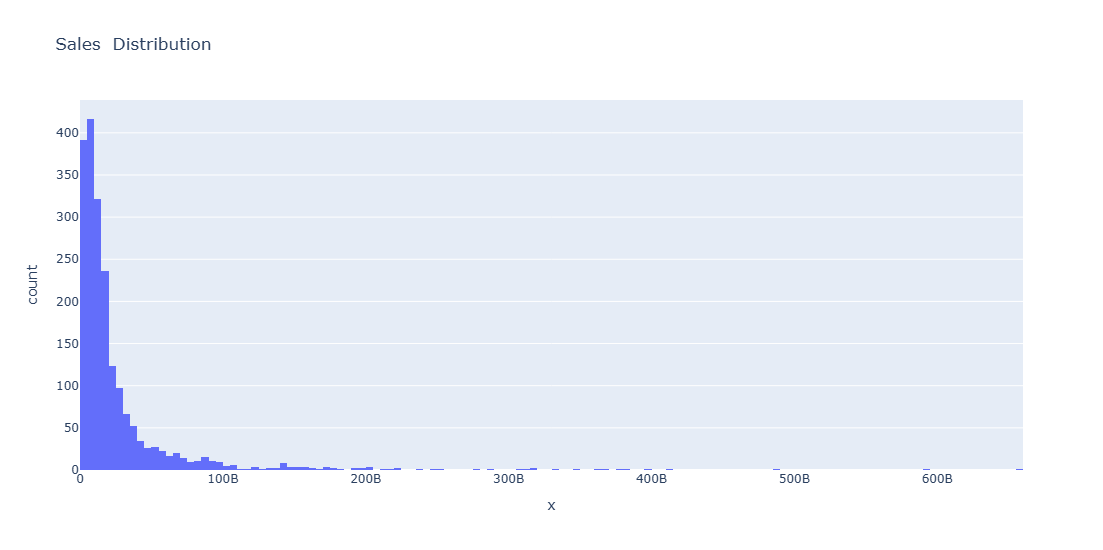

In [45]:
fig=px.histogram(x=df.Sales,title='Sales  Distribution')
fig.update_layout(width=1000,height=550)
fig.show()

most of the companies making sales more than 5 Billion

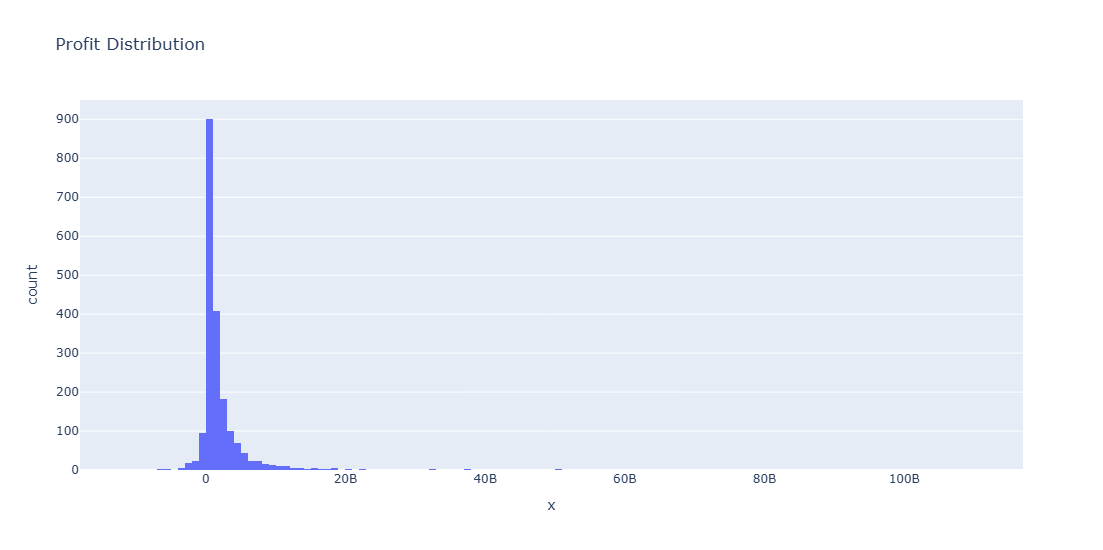

In [49]:
fig=px.histogram(x=df.Profit,title='Profit Distribution')
fig.update_layout(width=1000,height=550)
fig.show()

from this chart wecan understand that most of the companies making profit below 1 Billoin there are some companies making profit below 0 billion

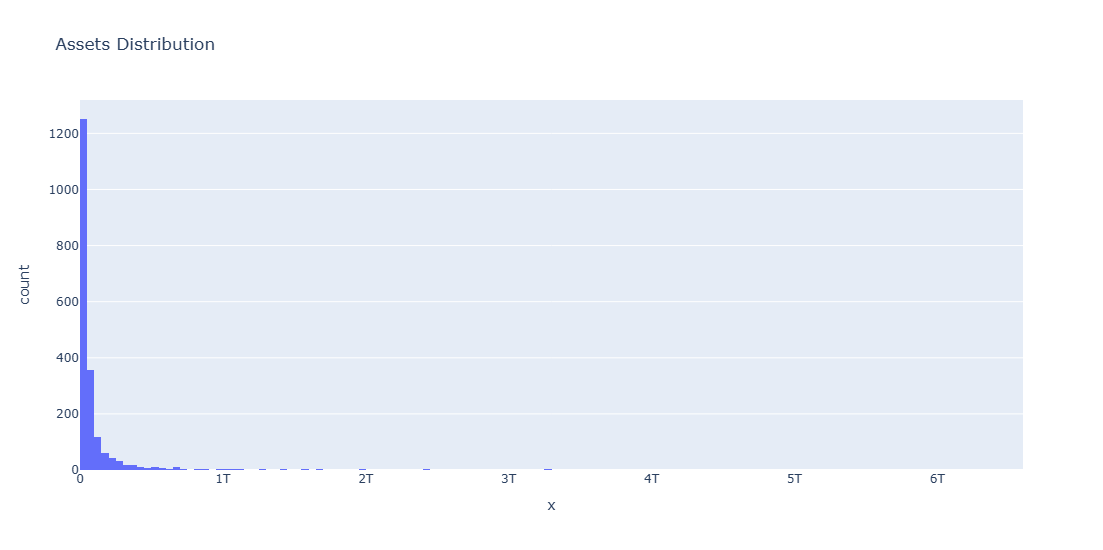

In [52]:
fig=px.histogram(x=df.Assets,title='Assets Distribution')
fig.update_layout(width=1000,height=550)
fig.show()

companies have assets between 0-1 trillion and majority have atleast 0-50 Billion

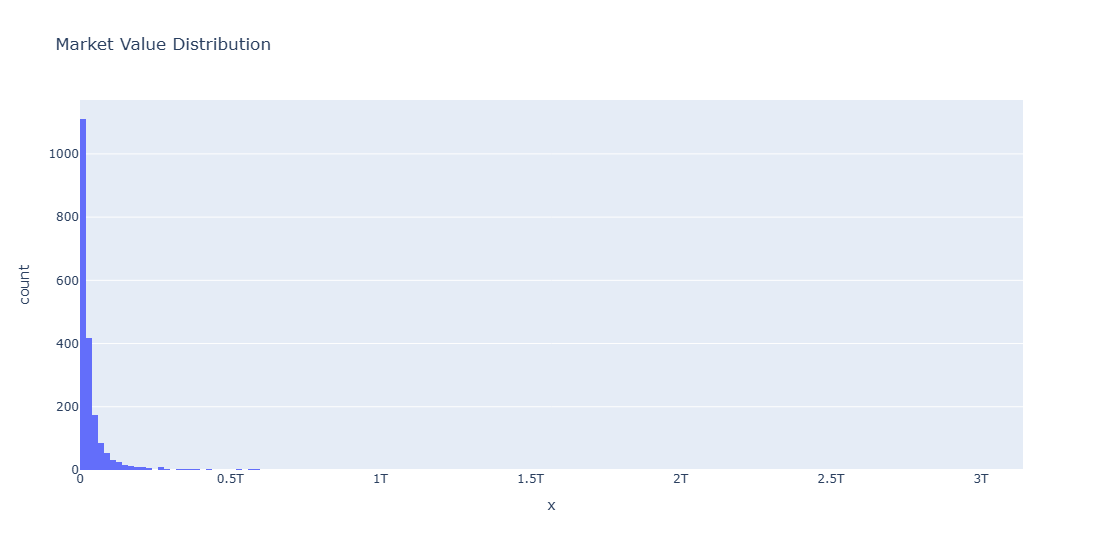

In [60]:
fig=px.histogram(x=df['Market Value'],title='Market Value Distribution')
fig.update_layout(width=1000,height=550)
fig.show()

most of the companies have 0-20 billion market value and then the trent is falling which means when market values going forward number of companies have been significantly decreases

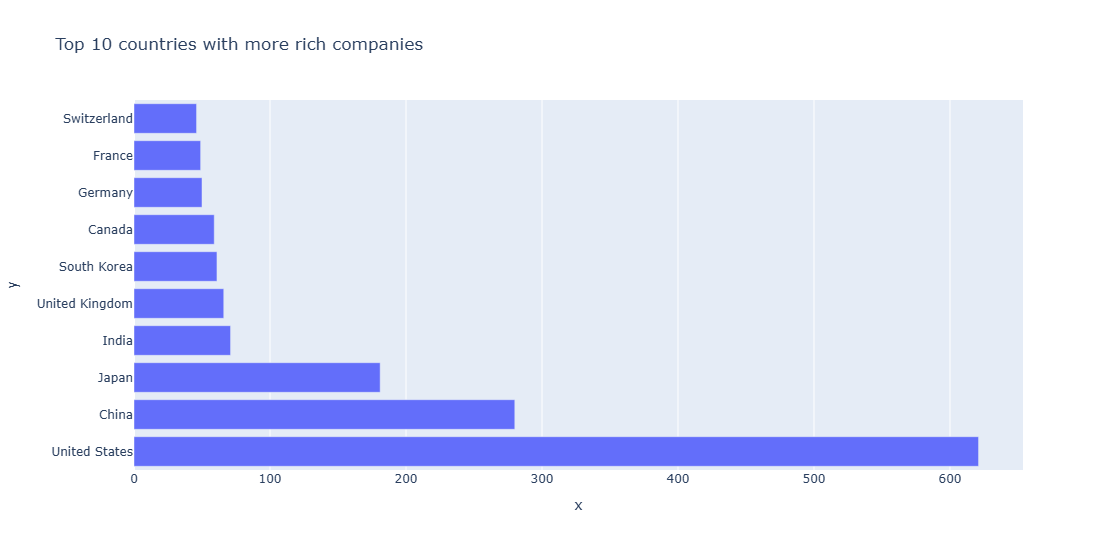

In [85]:
country=df.groupby('Country').agg({'Name':'count'}).sort_values(by='Name',ascending=False).reset_index().head(10)
fig=px.bar(y=country.Country,x=country.Name,title='Top 10 countries with more rich companies')
fig.update_layout(width=1000,height=550)
fig.show()

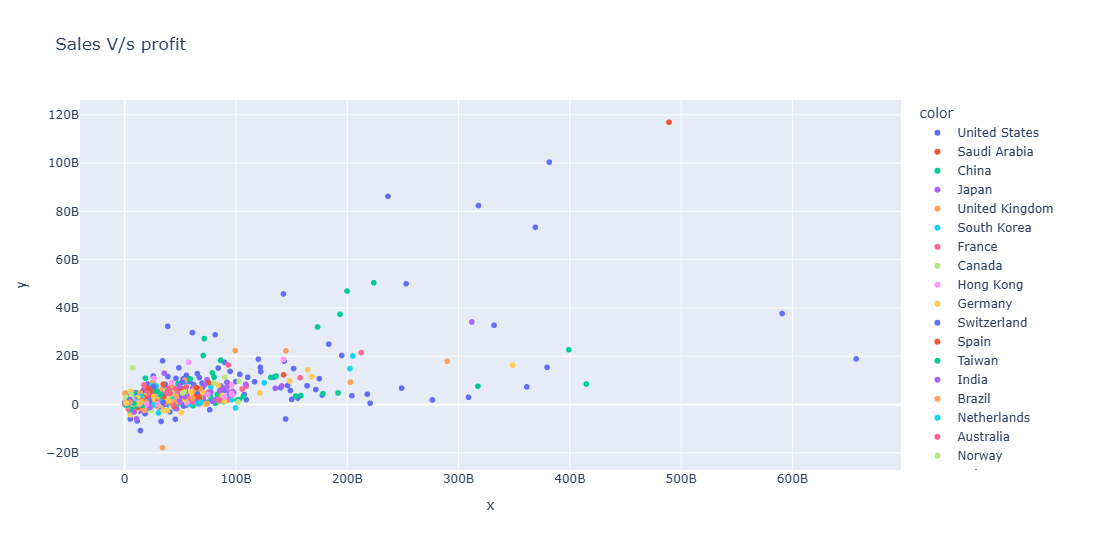

In [95]:
fig=px.scatter(x=df.Sales,y=df.Profit,color=df.Country,title='Sales V/s profit',hover_name=df.Name)
fig.update_layout(width=1000,height=550)
fig.show()

when sales increase the profit also incraese  but there are some companies making low profit even they have good number of sales 

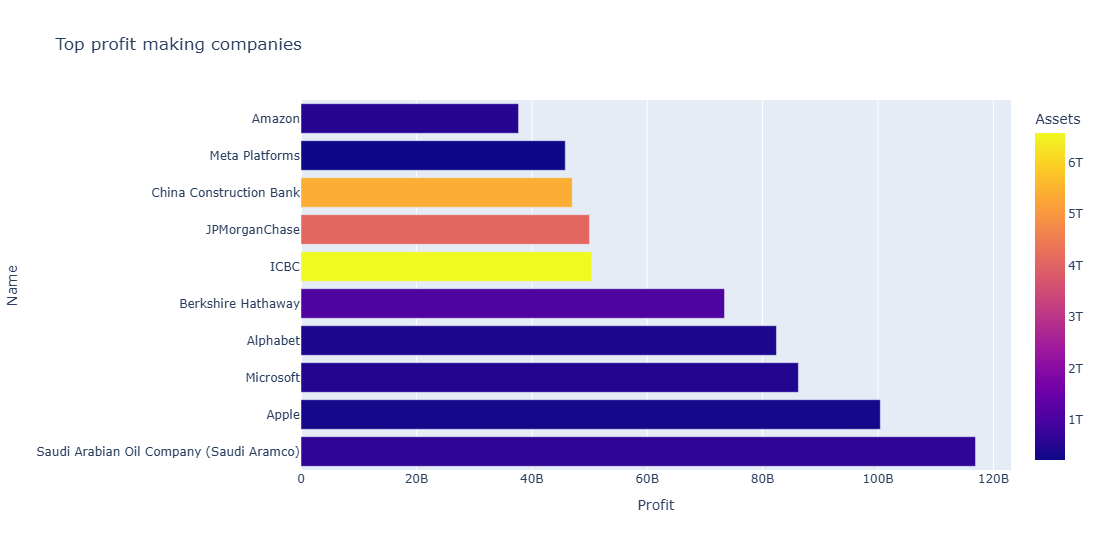

In [102]:
fig=px.bar(df.nlargest(10,'Profit')[['Name','Profit','Assets']],x='Profit',y='Name',color='Assets',title='Top profit making companies')
fig.update_layout(width=1000,height=550)
fig.show()

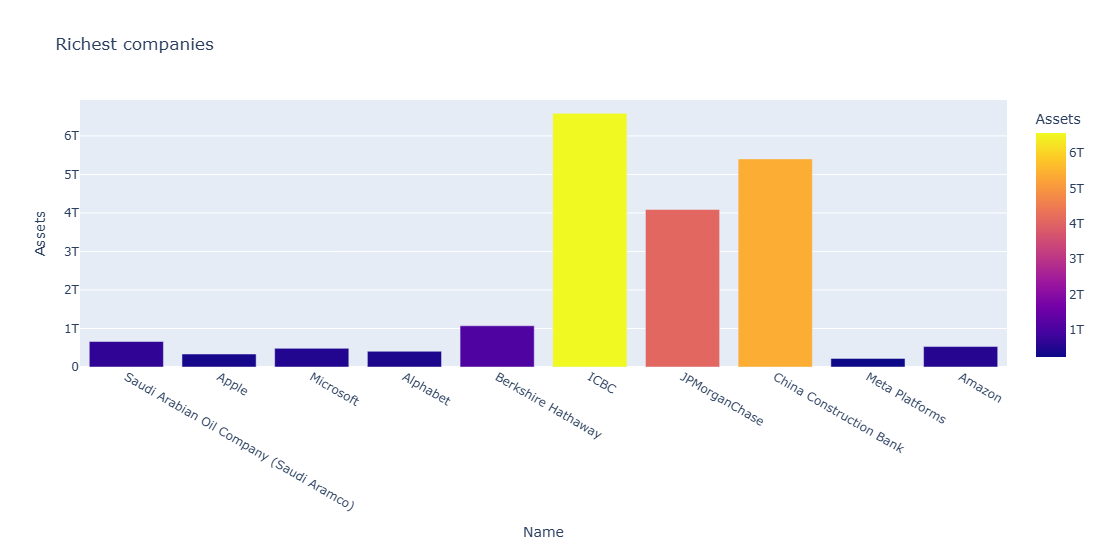

In [106]:
fig=px.bar(df.nlargest(10,'Profit')[['Name','Assets']],y='Assets',x='Name',color='Assets',title='Richest companies')
fig.update_layout(width=1000,height=550)
fig.show()

In [110]:
df['profit_sale_ratio']=df.Profit/df.Sales

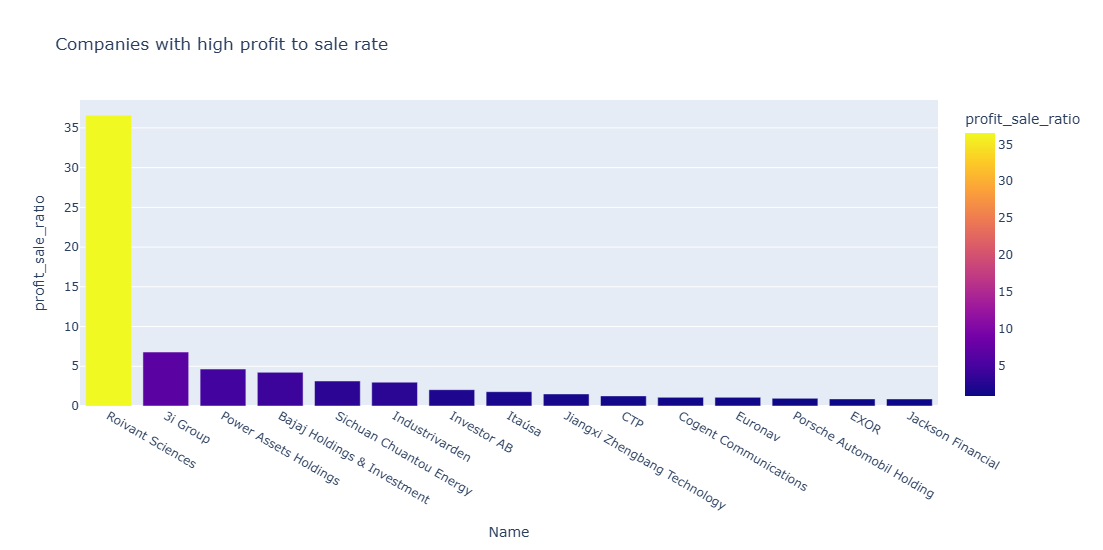

In [132]:
fig=px.bar(df.nlargest(15,'profit_sale_ratio'),x='Name',y='profit_sale_ratio',color='profit_sale_ratio',title='Companies with high profit to sale rate')
fig.update_layout(width=1000,height=550)
fig.show()

In [153]:
market=df.groupby('Country').agg({"Market Value":'sum'}).sort_values(by='Market Value',ascending=False).reset_index().head(15)

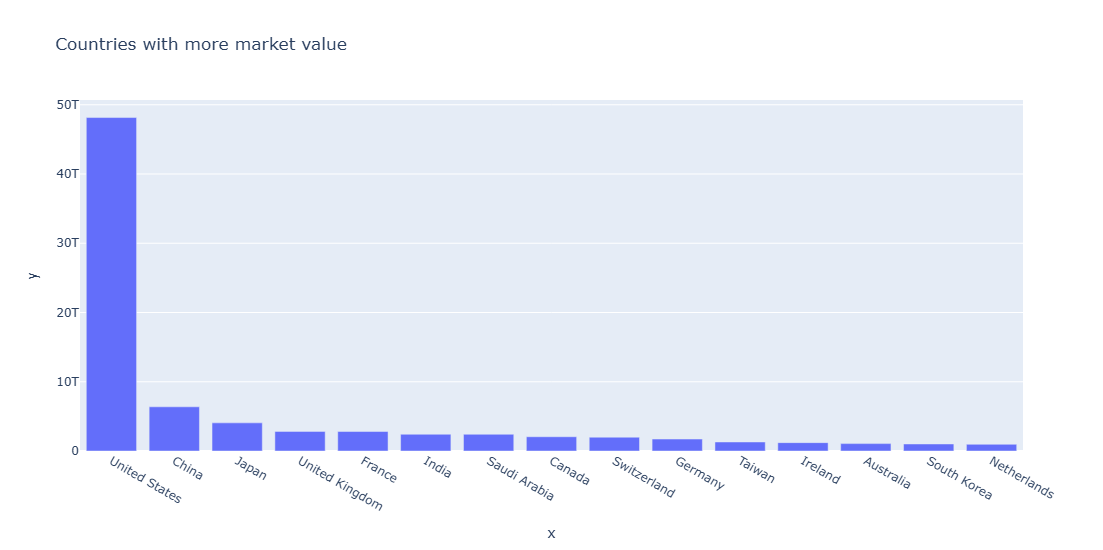

In [159]:
fig=px.bar(y=market['Market Value'],x=market.Country,title='Countries with more market value')
fig.update_layout(width=1000,height=550)
fig.show()

In [161]:
market_company=df.groupby('Name').agg({"Market Value":'sum'}).sort_values(by='Market Value',ascending=False).reset_index().head(15)

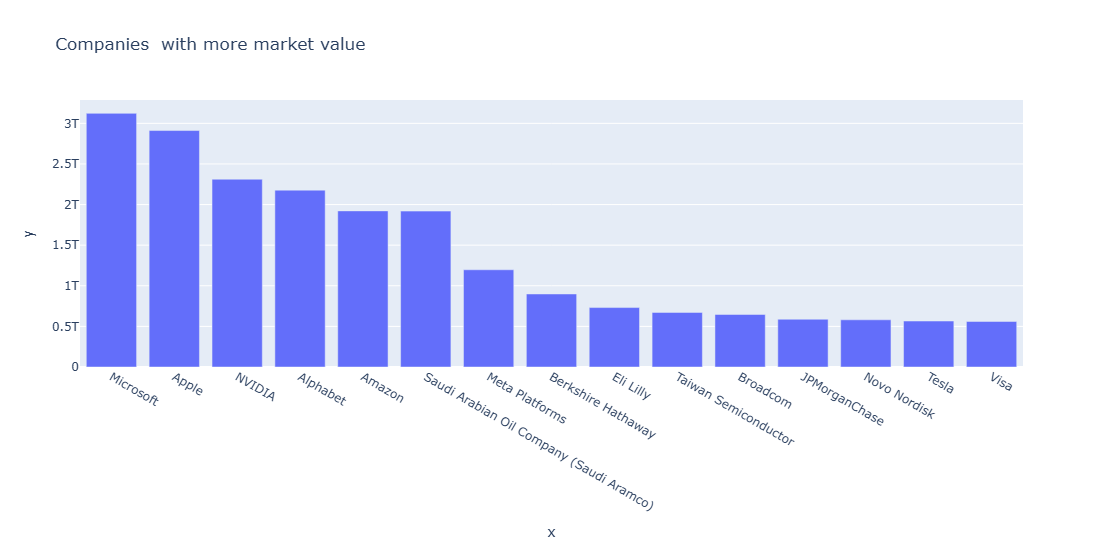

In [163]:
fig=px.bar(y=market_company['Market Value'],x=market_company.Name,title='Companies  with more market value')
fig.update_layout(width=1000,height=550)
fig.show()

In [165]:
df

,Name,Country,Sales,Profit,Assets,Market Value,profit_sale_ratio
0,JPMorganChase,United States,2.529000e+11,5.000000e+10,4.090700e+12,5.881000e+11,0.197707
1,Berkshire Hathaway,United States,3.690000e+11,7.340000e+10,1.070000e+12,8.991000e+11,0.198916
2,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,4.891000e+11,1.169000e+11,6.615000e+11,1.919300e+12,0.239010
3,ICBC,China,2.238000e+11,5.040000e+10,6.586000e+12,2.152000e+11,0.225201
4,Bank of America,United States,1.833000e+11,2.500000e+10,3.273800e+12,3.073000e+11,0.136388
...,...,...,...,...,...,...,...
1996,Sichuan Chuantou Energy,China,2.010000e+08,6.327000e+08,8.600000e+09,1.130000e+10,3.147761
1997,Vietnam Prosperity Joint-sock Commercial Bank,Vietnam,3.900000e+09,4.602000e+08,3.320000e+10,6.000000e+09,0.118000
1998,Adient,United States,1.520000e+10,1.580000e+08,9.300000e+09,2.600000e+09,0.010395
1999,CapitaLand Investment,Singapore,2.200000e+09,1.348000e+08,2.590000e+10,1.000000e+10,0.061273


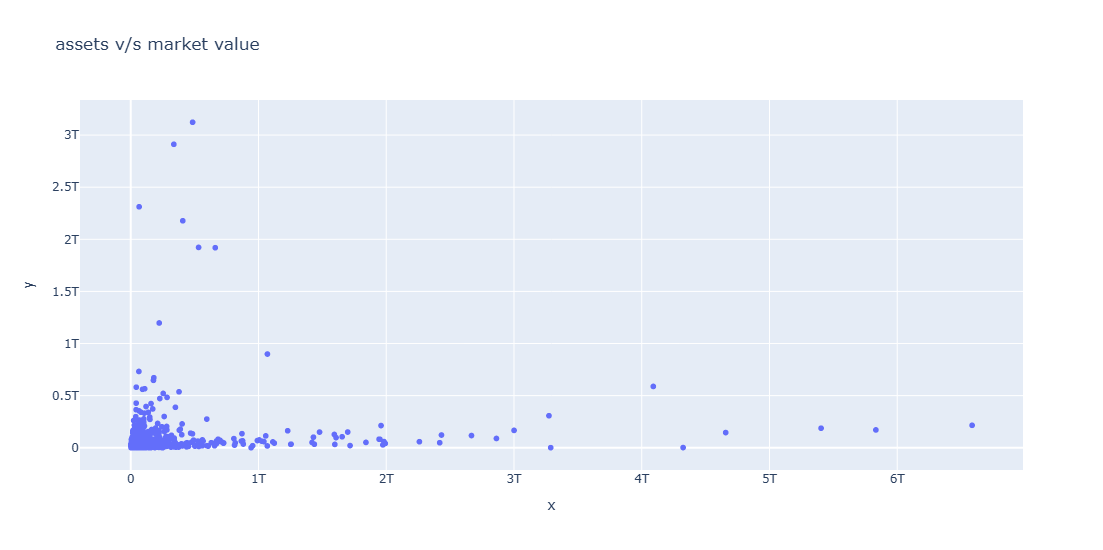

In [177]:
fig=px.scatter(x=df.Assets,y=df['Market Value'],hover_name=df.Name,title='assets v/s market value')
fig.update_layout(width=1000,height=550)
fig.show()

from this data we can understand that market value will not directly depending assets value.there are some companies which have more ass  